In [1]:
import torch
torch.cuda.is_available()


True

In [2]:
!wget https://github.com/znxlwm/UGATIT-pytorch/archive/refs/heads/master.zip -O UGATIT-pytorch.zip
!unzip UGATIT-pytorch.zip -d .
%cd UGATIT-pytorch-master


--2026-02-10 15:08:14--  https://github.com/znxlwm/UGATIT-pytorch/archive/refs/heads/master.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/znxlwm/UGATIT-pytorch/zip/refs/heads/master [following]
--2026-02-10 15:08:15--  https://codeload.github.com/znxlwm/UGATIT-pytorch/zip/refs/heads/master
Resolving codeload.github.com (codeload.github.com)... 140.82.112.10
Connecting to codeload.github.com (codeload.github.com)|140.82.112.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘UGATIT-pytorch.zip’

UGATIT-pytorch.zip      [   <=>              ]   4.30M  9.00MB/s    in 0.5s    

2026-02-10 15:08:15 (9.00 MB/s) - ‘UGATIT-pytorch.zip’ saved [4513589]

Archive:  UGATIT-pytorch.zip
b8c4251823673189999484d07e97fdcb9300e9e0
   creating: ./UGATIT-pytorch-master/
  infl

In [3]:
!pip install torch torchvision tqdm pillow


In [4]:
pwd

'/content/UGATIT-pytorch-master'

In [6]:
# Unzip the subset into the dataset directory
!unzip -q /content/ugatit_subset.zip -d /content/UGATIT-pytorch-master/dataset/

In [ ]:
# ================================
# Full U-GAT-IT Colab Pipeline
# ================================

import os
from PIL import Image
from IPython.display import display

# --- Paths ---
repo_path = "/content/UGATIT-pytorch-master"
dataset_src = "/content/UGATIT-pytorch-master/dataset/ugatit_subset"
dataset_dest = os.path.join(repo_path, "datasets", "shinchan2real")
results_dir = os.path.join(repo_path, "results")

# --- Step 1: Copy dataset into repo ---
!mkdir -p {os.path.join(repo_path, 'datasets')}
!cp -r {dataset_src} {os.path.join(repo_path, 'datasets')}

# Verify dataset
print("Files in trainA:", len(os.listdir(os.path.join(dataset_dest, "trainA"))))
print("Files in trainB:", len(os.listdir(os.path.join(dataset_dest, "trainB"))))
print("Files in testA:", len(os.listdir(os.path.join(dataset_dest, "testA"))))
print("Files in testB:", len(os.listdir(os.path.join(dataset_dest, "testB"))))

# --- Step 2: Train GAN ---
!python {os.path.join(repo_path, 'main.py')} \
--phase train \
--dataset shinchan2real \
--light True \
--batch_size 1 \
--iteration 20000 \
--result_dir {results_dir}

# --- Step 3: Test / Generate ---
!python {os.path.join(repo_path, 'main.py')} \
--phase test \
--dataset shinchan2real \
--result_dir {results_dir}

# --- Step 4: Preview top 5 generated images ---
preview_folder = os.path.join(results_dir, "shinchan2real", "test_latest", "images")
print("Previewing top 5 generated images from:", preview_folder)

for idx, f in enumerate(sorted(os.listdir(preview_folder))):
    if idx >= 5:
        break
    display(Image.open(os.path.join(preview_folder, f)))

In [7]:
%cd /content/UGATIT-pytorch-master

/content/UGATIT-pytorch-master


In [9]:
# Fix the PyTorch iterator error
with open('/content/UGATIT-pytorch-master/UGATIT.py', 'r') as f:
    code = f.read()

# Replace old syntax with new syntax
code = code.replace('trainA_iter.next()', 'next(trainA_iter)')
code = code.replace('trainB_iter.next()', 'next(trainB_iter)')

with open('/content/UGATIT-pytorch-master/UGATIT.py', 'w') as f:
    f.write(code)

print("✅ UGATIT.py successfully patched!")

✅ UGATIT.py successfully patched!


In [11]:
# Comprehensive Patch for UGATIT.py
with open('/content/UGATIT-pytorch-master/UGATIT.py', 'r') as f:
    lines = f.readlines()

patched_lines = []
for line in lines:
    # Fix the .next() attribute for any iterator (trainA, trainB, testA, etc.)
    if '.next()' in line:
        # Example: real_A, _ = trainA_iter.next() -> real_A, _ = next(trainA_iter)
        iterator_name = line.split('=')[1].strip().split('.')[0]
        patched_line = line.replace(f'{iterator_name}.next()', f'next({iterator_name})')
        patched_lines.append(patched_line)
    else:
        patched_lines.append(line)

with open('/content/UGATIT-pytorch-master/UGATIT.py', 'w') as f:
    f.writelines(patched_lines)

print("✅ UGATIT.py fully patched for all iterators (train and test).")

✅ UGATIT.py fully patched for all iterators (train and test).


In [12]:
%cd /content/UGATIT-pytorch-master

!python main.py \
--phase train \
--dataset ugatit_subset \
--light True \
--batch_size 1 \
--iteration 1000 \
--save_freq 500 \
--print_freq 100 \
--result_dir /content/results

/content/UGATIT-pytorch-master
number of epochs must be larger than or equal to one

##### Information #####
# light :  True
# dataset :  ugatit_subset
# batch_size :  1
# iteration per epoch :  1000

##### Generator #####
# residual blocks :  4

##### Discriminator #####
# discriminator layer :  6

##### Weight #####
# adv_weight :  1
# cycle_weight :  10
# identity_weight :  10
# cam_weight :  1000
training start !
/content/UGATIT-pytorch-master/UGATIT.py:244: UserWarning: Converting a tensor with requires_grad=True to a scalar may lead to unexpected behavior.
Consider using tensor.detach() first. (Triggered internally at /pytorch/torch/csrc/autograd/generated/python_variable_methods.cpp:836.)
  print("[%5d/%5d] time: %4.4f d_loss: %.8f, g_loss: %.8f" % (step, self.iteration, time.time() - start_time, Discriminator_loss, Generator_loss))
[    1/ 1000] time: 1.6221 d_loss: 7.78966045, g_loss: 4777.62207031
[    2/ 1000] time: 2.6527 d_loss: 5.38748503, g_loss: 2816.81494141
[    3/ 10

In [ ]:
%cd /content/UGATIT-pytorch-master

!python main.py \
--phase test \
--dataset ugatit_subset \
--light True \
--result_dir /content/results

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Path to the generated images
res_path = "/content/results/ugatit_subset/test_latest"

# Get the first folder inside (usually named 'images' or the dataset name)
sub_dirs = [d for d in os.listdir(res_path) if os.path.isdir(os.path.join(res_path, d))]

if sub_dirs:
    img_dir = os.path.join(res_path, sub_dirs[0])
    # Look for files that end with '_A2B.png' (The Shinchan -> Real translation)
    output_images = sorted([f for f in os.listdir(img_dir) if 'A2B' in f])[:5]

    for img_name in output_images:
        img = Image.open(os.path.join(img_dir, img_name))
        plt.figure(figsize=(10, 5))
        plt.imshow(img)
        plt.title(f"Translated Result: {img_name}")
        plt.axis('off')
        plt.show()
else:
    print("No images found yet. Check if the test command finished without errors!")

In [13]:
# 1. Generate the test images
!python main.py \
--phase test \
--dataset ugatit_subset \
--light True \
--result_dir /content/results

# 2. Display the results
import os
import matplotlib.pyplot as plt
from PIL import Image

res_path = "/content/results/ugatit_subset/test_latest"
if os.path.exists(res_path):
    # Find the images in the subdirectory
    sub_dir = os.path.join(res_path, os.listdir(res_path)[0])
    sample_imgs = [f for f in os.listdir(sub_dir) if f.endswith(('.png', '.jpg'))][:3]

    for img_name in sample_imgs:
        plt.figure(figsize=(10, 5))
        plt.imshow(Image.open(os.path.join(sub_dir, img_name)))
        plt.axis('off')
        plt.show()

number of epochs must be larger than or equal to one

##### Information #####
# light :  True
# dataset :  ugatit_subset
# batch_size :  1
# iteration per epoch :  1000000

##### Generator #####
# residual blocks :  4

##### Discriminator #####
# discriminator layer :  6

##### Weight #####
# adv_weight :  1
# cycle_weight :  10
# identity_weight :  10
# cam_weight :  1000
 [*] Load SUCCESS
[ WARN:0@2.138] global loadsave.cpp:1089 imwrite_ Unsupported depth image for selected encoder is fallbacked to CV_8U.
 [*] Test finished!


In [14]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Automatically find the output folder
base_path = "/content/results/ugatit_subset/test_latest"
if os.path.exists(base_path):
    subfolders = [f for f in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, f))]
    img_dir = os.path.join(base_path, subfolders[0])

    # Display the first 3 generated 'A2B' (Shinchan to Real) images
    results = [f for f in os.listdir(img_dir) if 'A2B' in f][:3]
    for img_name in results:
        plt.figure(figsize=(8, 4))
        plt.imshow(Image.open(os.path.join(img_dir, img_name)))
        plt.axis('off')
        plt.show()

✅ Found 510 images. Displaying the first few:


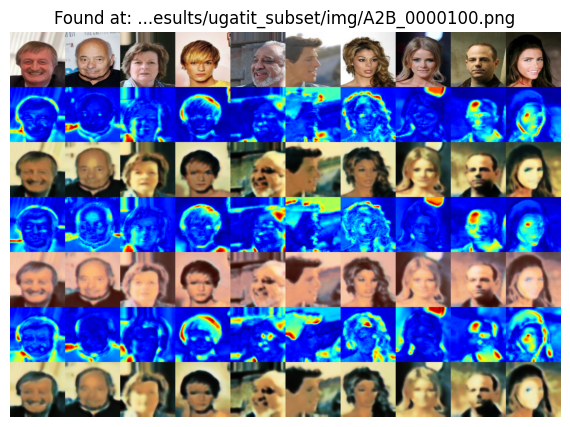

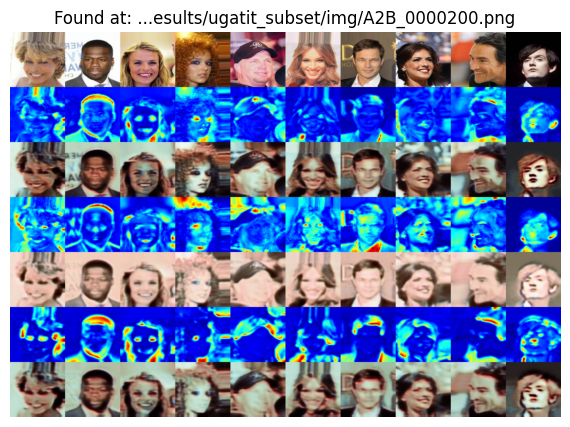

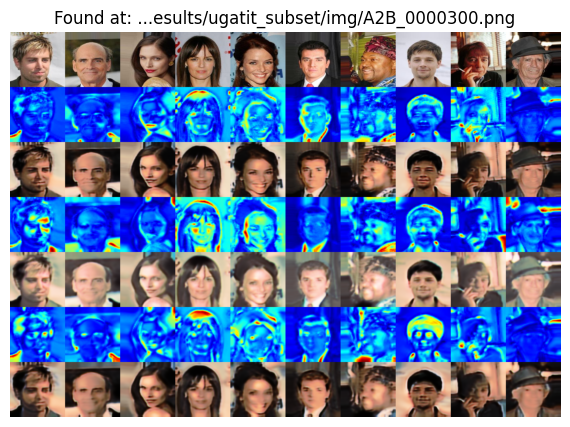

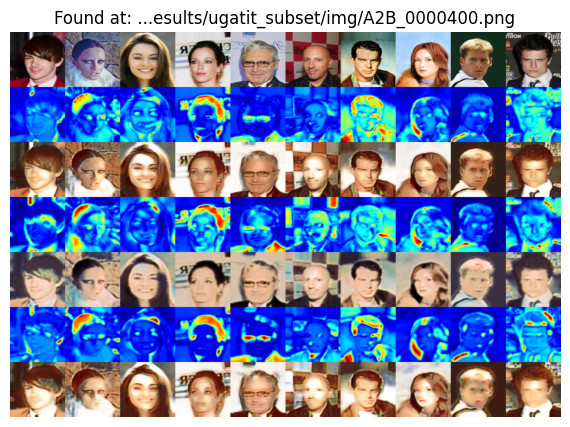

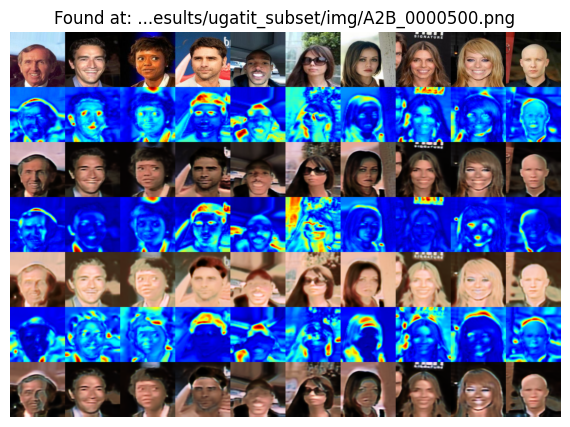

In [15]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# 1. Broadly search for any image in the results directory
results_base = "/content/results"
all_images = []

for root, dirs, files in os.walk(results_base):
    for file in files:
        if file.endswith(('.png', '.jpg', '.jpeg')) and 'A2B' in file:
            all_images.append(os.path.join(root, file))

# 2. Display what we found
if all_images:
    print(f"✅ Found {len(all_images)} images. Displaying the first few:")
    for img_path in sorted(all_images)[:5]:
        plt.figure(figsize=(10, 5))
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"Found at: ...{img_path[-40:]}")
        plt.axis('off')
        plt.show()
else:
    print("❌ No translated images (A2B) found yet.")
    print("Check your '/content/results' folder in the sidebar—is it empty?")